<a href="https://colab.research.google.com/github/Vardhanksai/DeepLearning/blob/main/2203A52152_DL_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
dataset_path = "/content/Copy of Load Data in kW.csv"
df = pd.read_csv(dataset_path)

df = df[['Time', 'Load (kW)']]
df.dropna(inplace=True)

In [4]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

df['Prev_Week_Load'] = df['Load (kW)'].shift(24 * 7)

df.dropna(inplace=True)

X = df[['Prev_Week_Load']].values
y = df['Load (kW)'].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [7]:
m = 1.0
c = -1.0
eta = 0.1
num_epochs = 100

gm_cache = 0
gc_cache = 0
epsilon = 1e-8


In [8]:
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        x_i = X_train[i]
        y_i = y_train[i]
        y_pred = m * x_i + c

        gm = -2 * (y_i - y_pred) * x_i
        gc = -2 * (y_i - y_pred)

        gm_cache += gm ** 2
        gc_cache += gc ** 2

        m -= (eta / (np.sqrt(gm_cache) + epsilon)) * gm
        c -= (eta / (np.sqrt(gc_cache) + epsilon)) * gc

In [9]:
y_train_pred = m * X_train + c
y_test_pred = m * X_test + c

In [10]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"Training Data - MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}")
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test Data - MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}")

Training Data - MSE: 36251691.27, RMSE: 6020.94, MAE: 5924.78
Test Data - MSE: 37100230.44, RMSE: 6091.00, MAE: 5989.15


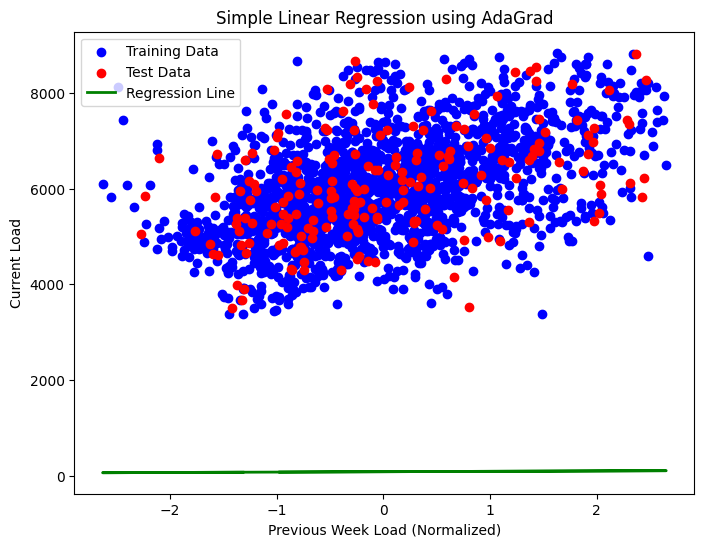

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Previous Week Load (Normalized)')
plt.ylabel('Current Load')
plt.title('Simple Linear Regression using AdaGrad')
plt.legend()
plt.show()
